In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("weatherAUS.csv")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
df.shape

(145460, 23)

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.drop(columns=["Date","Evaporation","Sunshine","Cloud9am","Cloud3pm","Temp9am","Temp3pm"],inplace=True)

In [6]:
df.isnull().sum()/df.shape[0]*100

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

<Axes: >

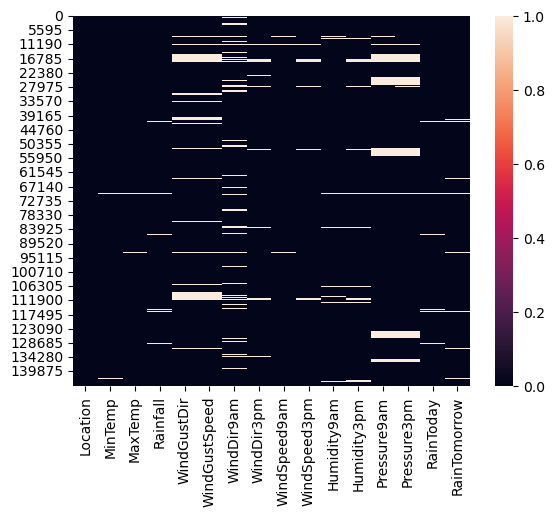

In [7]:
sns.heatmap(df.isnull())

In [8]:
num_features = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm']
cat_features = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [9]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean()).astype(float)

In [10]:
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean()).astype(float)

In [11]:
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean()).astype(float)

In [12]:
df['WindGustDir'] = df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

In [13]:
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean()).astype(float)

In [14]:
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

In [15]:
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [16]:
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean()).astype(float)

In [17]:
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean()).astype(float)

In [18]:
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean()).astype(float)

In [19]:
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean()).astype(float)

In [20]:
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean()).astype(float)

In [21]:
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean()).astype(float)

In [22]:
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

In [23]:
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [24]:
df['RainToday'].value_counts()

RainToday
No     113580
Yes     31880
Name: count, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   WindGustDir    145460 non-null  object 
 5   WindGustSpeed  145460 non-null  float64
 6   WindDir9am     145460 non-null  object 
 7   WindDir3pm     145460 non-null  object 
 8   WindSpeed9am   145460 non-null  float64
 9   WindSpeed3pm   145460 non-null  float64
 10  Humidity9am    145460 non-null  float64
 11  Humidity3pm    145460 non-null  float64
 12  Pressure9am    145460 non-null  float64
 13  Pressure3pm    145460 non-null  float64
 14  RainToday      145460 non-null  object 
 15  RainTomorrow   145460 non-null  object 
dtypes: float64(10), object(6)
memory usage: 17.8+ MB


In [26]:
df.describe()

MinTemp        MaxTemp       Rainfall  WindGustSpeed  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean       12.194034      23.221348       2.360918      40.035230   
std         6.365750       7.088124       8.382488      13.118253   
min        -8.500000      -4.800000       0.000000       6.000000   
25%         7.700000      18.000000       0.000000      31.000000   
50%        12.100000      22.700000       0.000000      39.000000   
75%        16.800000      28.200000       1.000000      46.000000   
max        33.900000      48.100000     371.000000     135.000000   

        WindSpeed9am   WindSpeed3pm    Humidity9am    Humidity3pm  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean       14.043426      18.662657      68.880831      51.539116   
std         8.861059       8.716581      18.854765      20.471189   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.000000      13.000000      57.000000      37.000000   
50%        13.000000      18.662657      69.000000      51.539116   
75%        19.000000      24.000000      83.000000      65.000000   
max       130.000000      87.000000     100.000000     100.000000   

         Pressure9am    Pressure3pm  
count  145460.000000  145460.000000  
mean     1017.649940    1015.255889  
std         6.728467       6.663973  
min       980.500000     977.100000  
25%      1013.500000    1011.100000  
50%      1017.649940    1015.255889  
75%      1021.800000    1019.400000  
max      1041.000000    1039.600000

<Axes: >

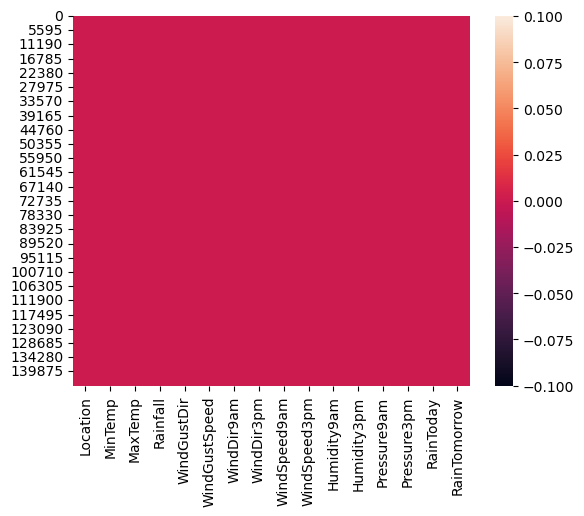

In [27]:
sns.heatmap(df.isnull())

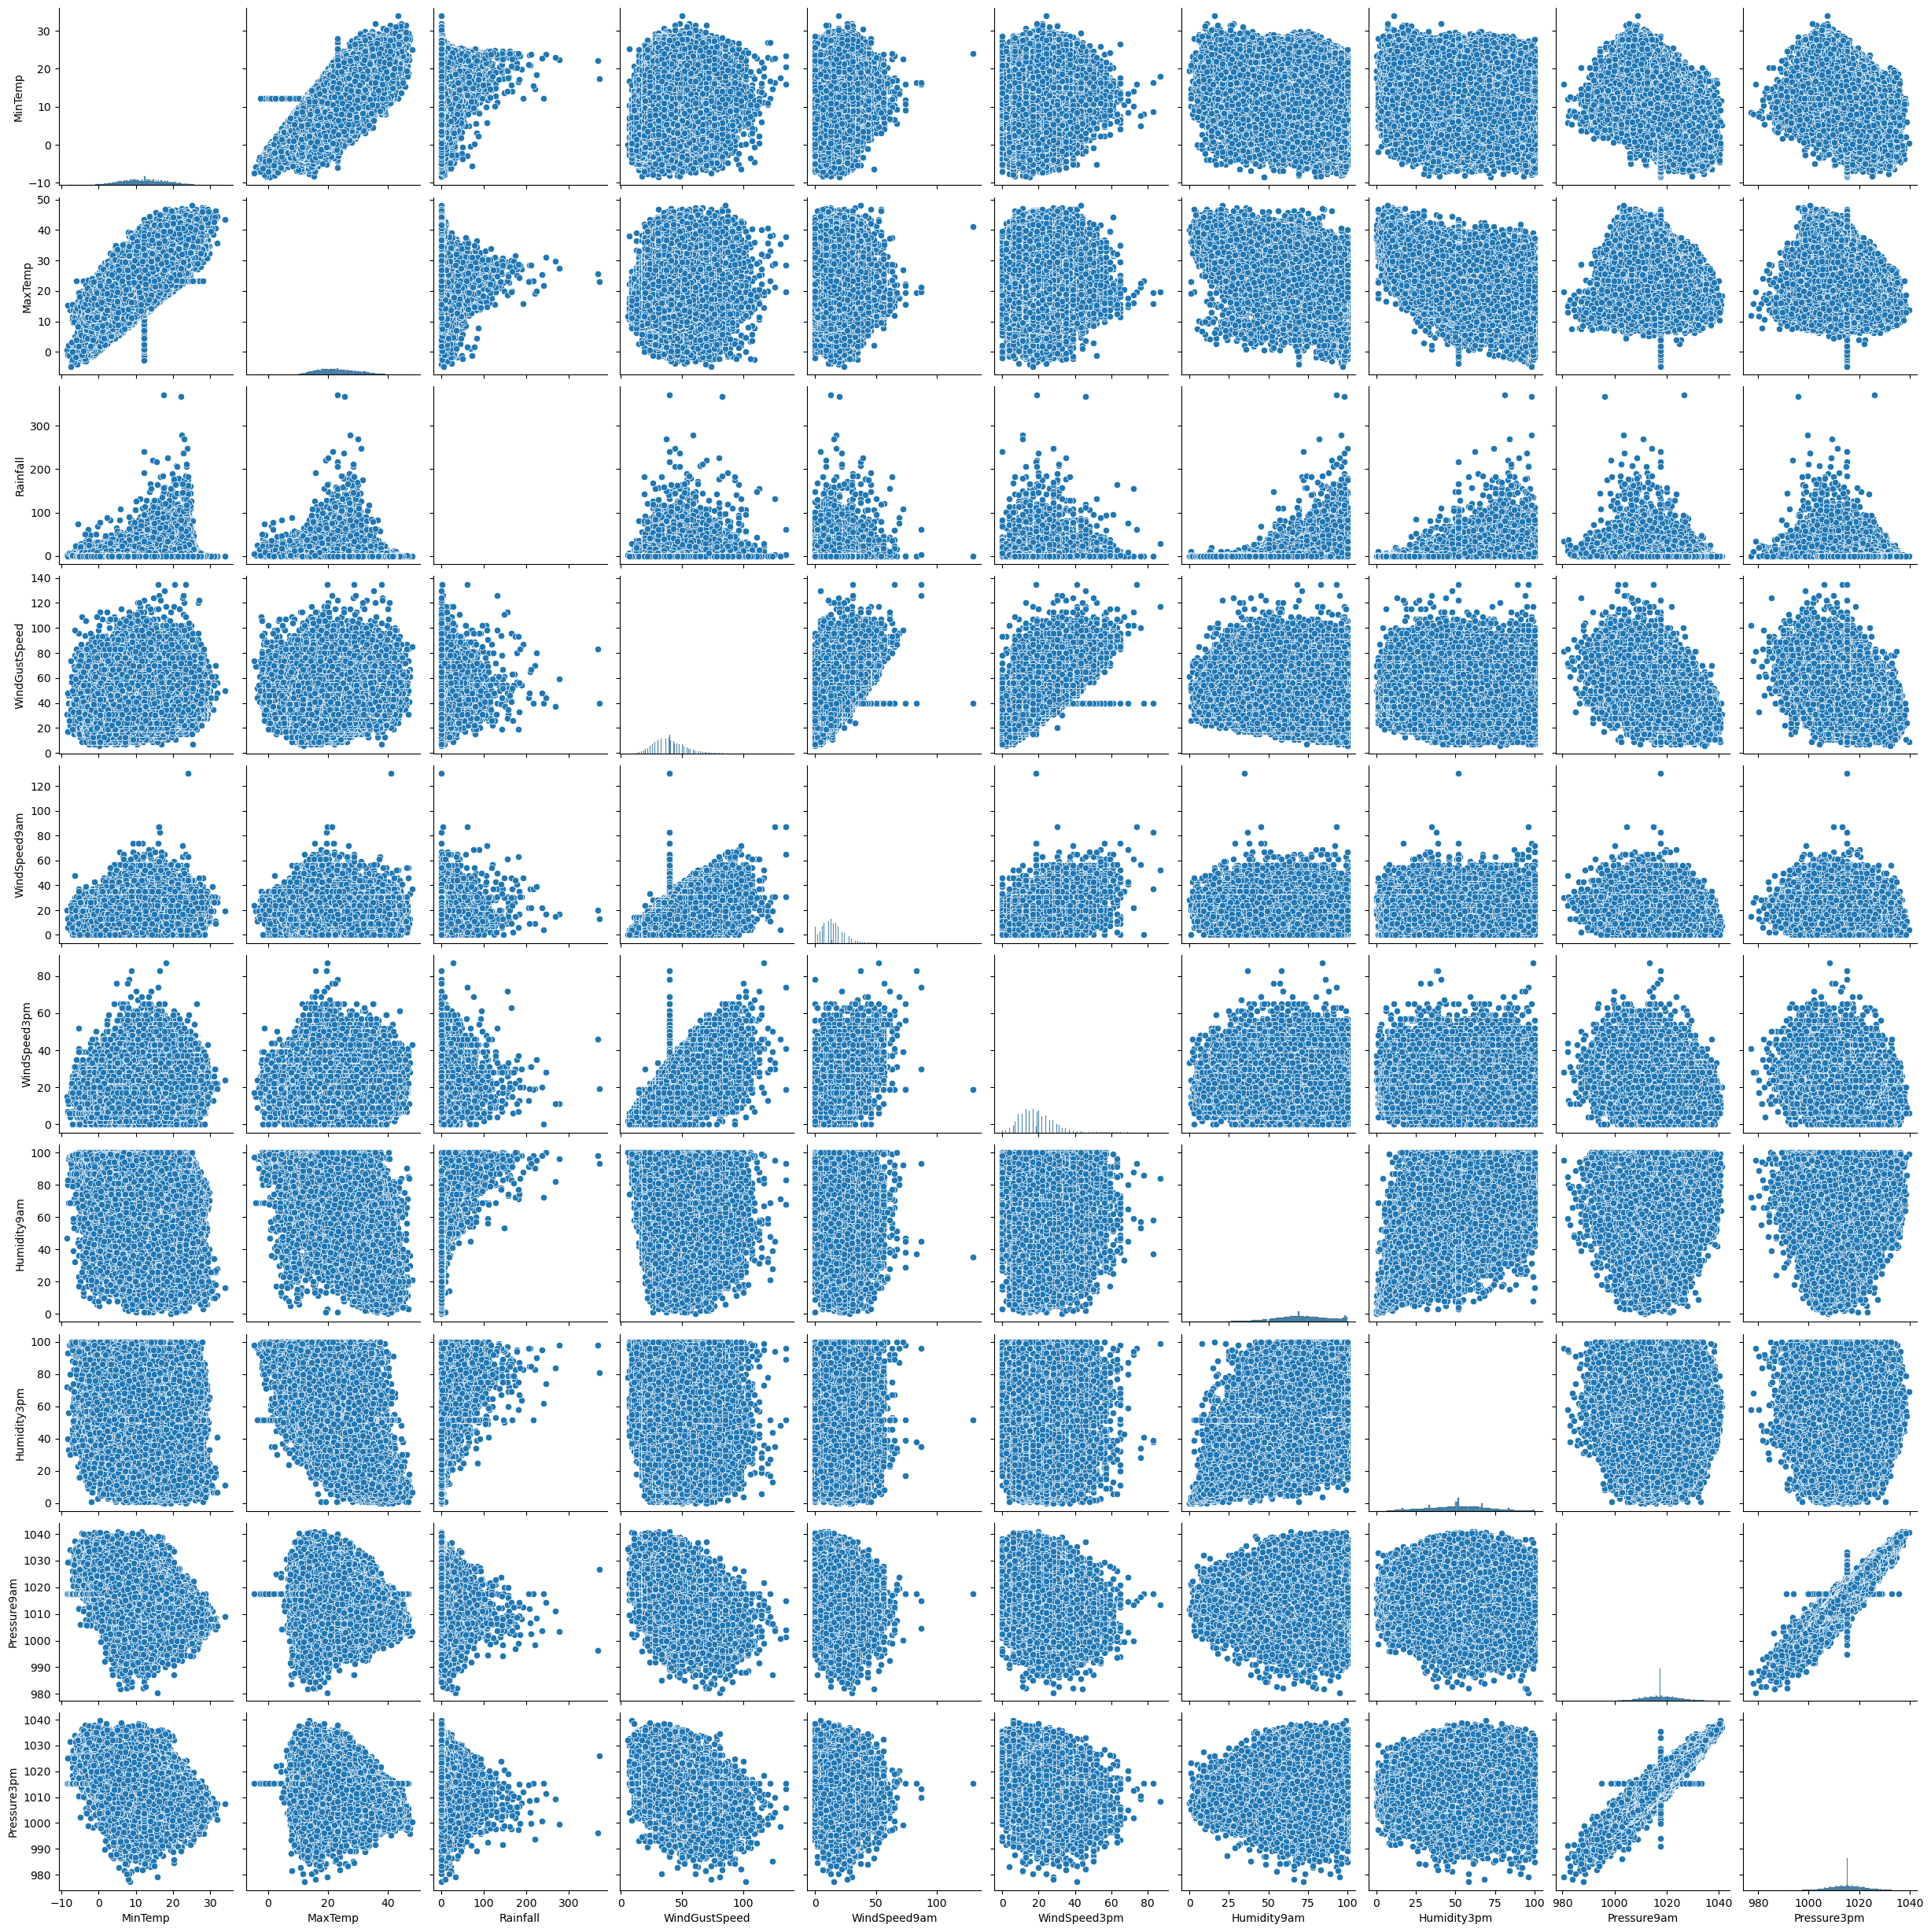

In [28]:
sns.pairplot(df)

In [30]:
wind_mapping = {
    'N': 'North',
    'NNE': 'North-Northeast',
    'NE': 'Northeast',
    'ENE': 'East-Northeast',
    'E': 'East',
    'ESE': 'East-Southeast',
    'SE': 'Southeast',
    'SSE': 'South-Southeast',
    'S': 'South',
    'SSW': 'South-Southwest',
    'SW': 'Southwest',
    'WSW': 'West-Southwest',
    'W': 'West',
    'WNW': 'West-Northwest',
    'NW': 'Northwest',
    'NNW': 'North-Northwest'
}    
df['WindGustDir'] = df['WindGustDir'].replace(wind_mapping).astype(object)
df['WindDir9am'] = df['WindDir9am'].replace(wind_mapping).astype(object)
df['WindDir3pm'] = df['WindDir3pm'].replace(wind_mapping).astype(object)
print("replace Success")

replace Success


In [31]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
RainToday        0
RainTomorrow     0
dtype: int64

In [32]:
df.sample(5)

Location  MinTemp  MaxTemp  Rainfall     WindGustDir  \
119448  PerthAirport     22.8     34.7       0.0  West-Southwest   
82444       Dartmoor     11.2     20.4       0.0       Southwest   
134680    Launceston      6.3     19.1       0.0       Northwest   
39592    Williamtown     20.2     34.9       0.2  West-Northwest   
28184       Richmond     14.8     36.8       0.0  West-Northwest   

        WindGustSpeed       WindDir9am      WindDir3pm  WindSpeed9am  \
119448           37.0        Northeast  West-Southwest          24.0   
82444            63.0   West-Northwest       Southwest           7.0   
134680           26.0   East-Northeast       Northwest           2.0   
39592            41.0  North-Northwest  West-Northwest           6.0   
28184            61.0            North            West           0.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
119448          26.0         35.0         51.0       1017.5       1016.9   
82444           31.0         89.0         76.0       1017.1       1018.2   
134680          13.0         93.0         70.0       1030.0       1023.8   
39592           13.0         83.0         34.0       1014.6       1011.5   
28184           37.0         80.0         19.0       1009.6       1004.9   

       RainToday RainTomorrow  
119448        No           No  
82444         No          Yes  
134680        No          Yes  
39592         No           No  
28184         No           No

In [33]:
x=df.drop(columns=["RainTomorrow"])
y=df['RainTomorrow']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=100)

In [36]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((116368, 15), (29092, 15), (116368,), (29092,))

In [37]:
num_features = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm']
cat_features = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']

In [38]:
make_col = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),cat_features),
                                   (StandardScaler(with_mean=False),num_features),
                                   remainder="passthrough")
make_col

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Location', 'WindGustDir', 'WindDir9am',
                                  'WindDir3pm', 'RainToday']),
                                ('standardscaler',
                                 StandardScaler(with_mean=False),
                                 ['MinTemp', 'MaxTemp', 'Rainfall',
                                  'WindGustSpeed', 'WindSpeed9am',
                                  'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                                  'Pressure9am', 'Pressure3pm'])])

In [39]:
model = LogisticRegression()

In [40]:
pipe = make_pipeline(make_col,model)

In [41]:
pipe.fit(x_train,y_train)

d:\Users\11\.vscode\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am', 'WindDir3pm',
                                                   'RainToday']),
                                                 ('standardscaler',
                                                  StandardScaler(with_mean=False),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am',
                                                   'Pressure3pm'])])),
                ('logisticregression', LogisticRegression())])

In [42]:
pipe.predict(x_test)

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [43]:
pipe.score(x_test,y_test)

0.8413996975113434

In [44]:
df.sample(5)

Location  MinTemp  MaxTemp  Rainfall      WindGustDir  \
39045   WaggaWagga     12.7     33.6       0.0  South-Southwest   
109438      Albany     14.8     21.0       5.7             West   
124613  SalmonGums     16.3     27.7       0.0   East-Southeast   
105008   Nuriootpa     20.3     24.4       2.2   West-Southwest   
69298    Melbourne     11.0     14.7       0.0            North   

        WindGustSpeed       WindDir9am       WindDir3pm  WindSpeed9am  \
39045        41.00000   East-Northeast  South-Southwest          11.0   
109438       40.03523  North-Northwest   West-Southwest           7.0   
124613       46.00000             East             East          26.0   
105008       44.00000             West        Southwest          24.0   
69298        85.00000            North            North          48.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
39045           17.0         51.0         19.0   1011.50000  1009.600000   
109438          17.0         91.0         80.0   1012.70000  1012.300000   
124613          28.0         52.0         29.0   1017.64994  1015.255889   
105008          22.0         88.0         50.0   1007.80000  1011.100000   
69298           48.0         67.0         48.0   1012.30000  1005.000000   

       RainToday RainTomorrow  
39045         No           No  
109438       Yes          Yes  
124613        No           No  
105008       Yes           No  
69298         No           No

In [45]:
predict_data = pd.DataFrame([["Albury",7.4,25.1,0.6,"West",44.0,"West","West",4.0,22.0,44.0,25.0,1010.6,1007.8,"No"]],
                            columns=['Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','RainToday'])

In [46]:
predict_data[num_features] = predict_data[num_features].apply(pd.to_numeric, errors='coerce')

In [47]:
pipe.predict(predict_data)

array(['No'], dtype=object)

In [48]:
import pickle

In [49]:
pickle.dump(pipe,open("pipe.pkl","wb"))
pickle.dump(df,open("df.pkl","wb"))
pickle.dump(x.columns, open("columns.pkl","wb"))

print("Pickle File Successfully Created")

Pickle File Successfully Created


In [50]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'RainToday'],
      dtype='object')